Question 01 - Intensity Transfomation

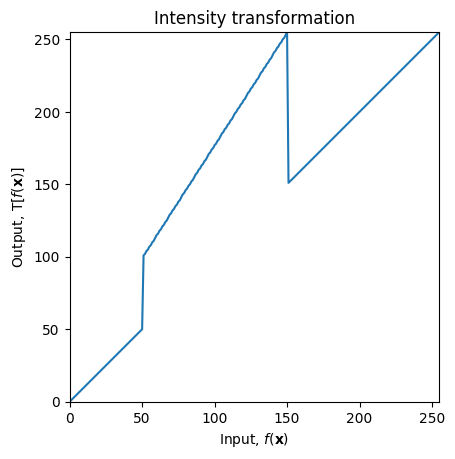

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0, 50, 51).astype('uint8')
t2 = np.linspace(51, 100, 0).astype('uint8')
t3 = np.linspace(101 , 255, 100).astype('uint8')
t4 = np.linspace(255, 150, 0).astype('uint8')
t5 = np.linspace(151, 255, 105).astype('uint8')
transform = np.concatenate((t1, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_title("Intensity transformation")
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Intensity transformed Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

Question 02 - Intensity Transfomation for white and gray matter

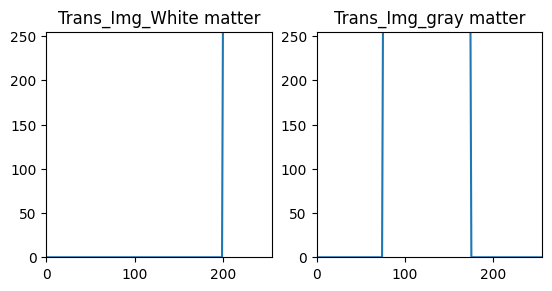

In [21]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.zeros(200)
t2 = 255*np.ones(56)
t3 = np.zeros(75)
t4 = 255*np.ones(100)
t5 = np.zeros(81)
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
transform2 = np.concatenate((t3, t4, t5), axis=0).astype('uint8')
fig, ax = plt.subplots(1,2)
ax[0].plot(transform1), ax[0].set_title("Trans_Img_White matter")
ax[0].set_xlim(0,255), ax[0].set_ylim(0,255), ax[0].set_aspect('equal')
ax[1].plot(transform2), ax[1].set_title("Trans_Img_gray matter")
ax[1].set_xlim(0,255), ax[1].set_ylim(0,255), ax[1].set_aspect('equal')
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed_whitematter = cv.LUT(img_orig, transform1)
cv.imshow("Trans_Img_White matter", image_transformed_whitematter)
cv.waitKey(0)
image_transformed_graymatter = cv.LUT(img_orig, transform2)
cv.imshow("Trans_Img_gray matter", image_transformed_graymatter)
cv.waitKey(0)
cv.destroyAllWindows()

Question 03 - Gamma Correction

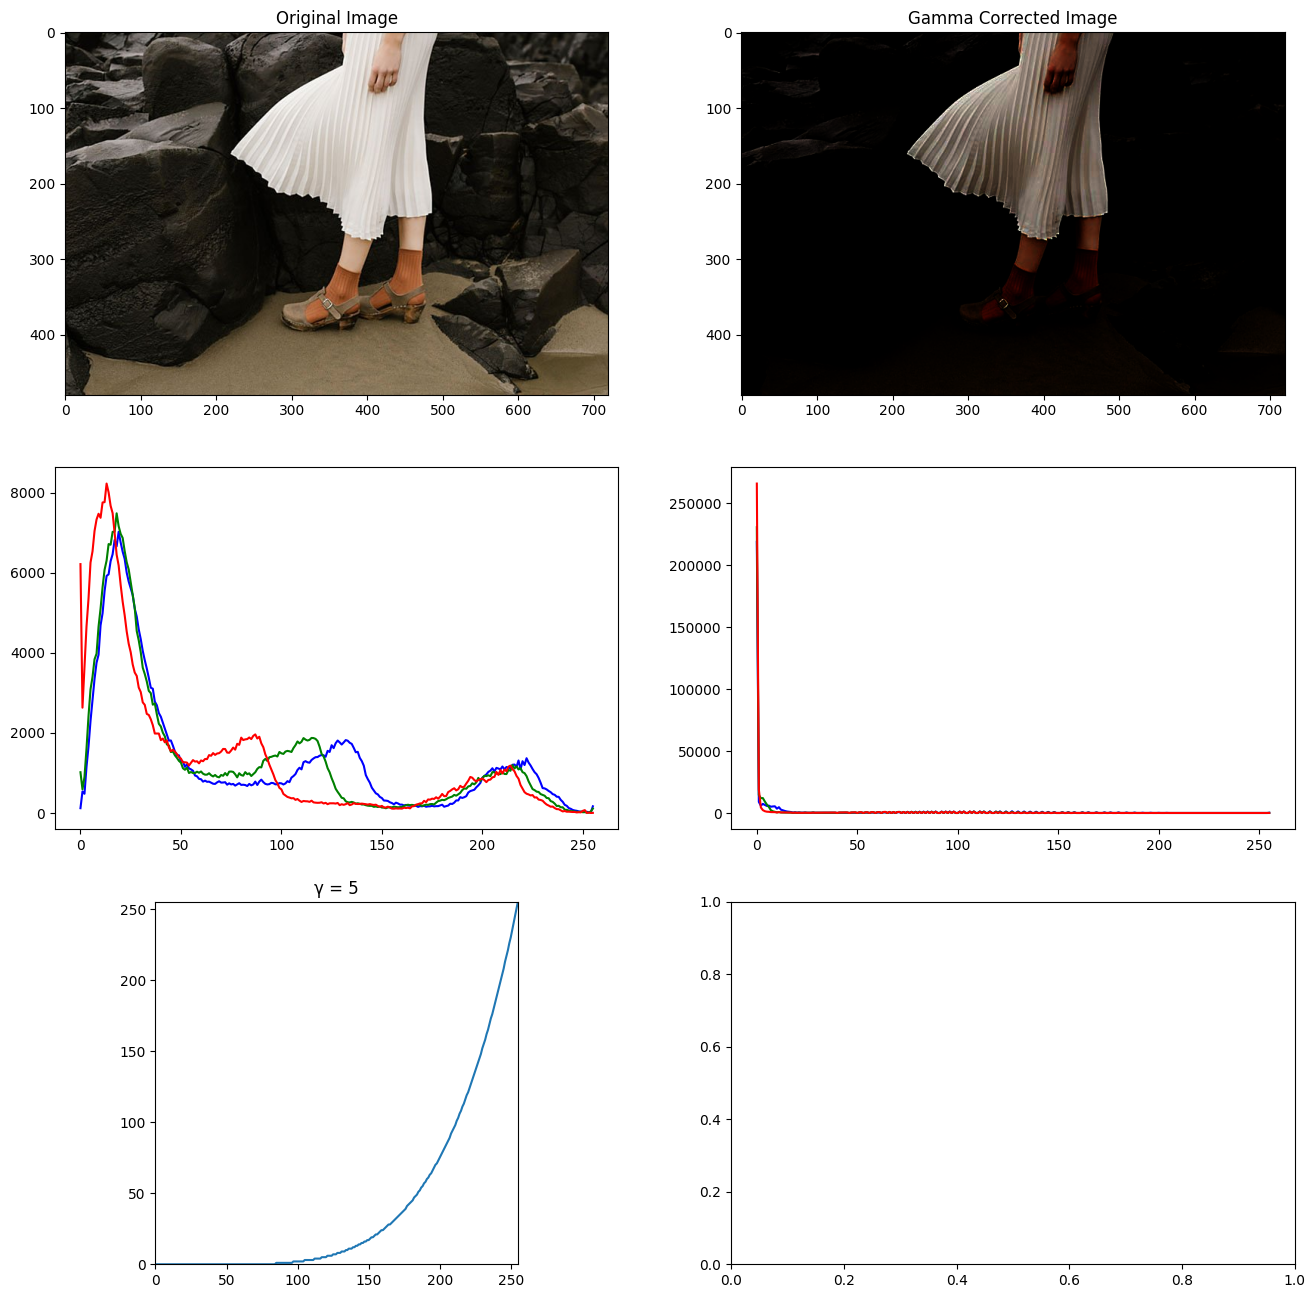

In [18]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)

gamma = 5
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots(3,2, figsize=(16,16))
axarr[0,0].imshow(img_orig)
axarr[0,0].set_title('Original Image')
axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('Gamma Corrected Image')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    
axarr[2,0].plot(table)
axarr[2,0].set_title("\u03B3 = "+ str(gamma))
axarr[2,0].set_xlim(0,255)
axarr[2,0].set_ylim(0,255)
axarr[2,0].set_aspect('equal')

Question 04 - Increasing the vibrance of a photograph

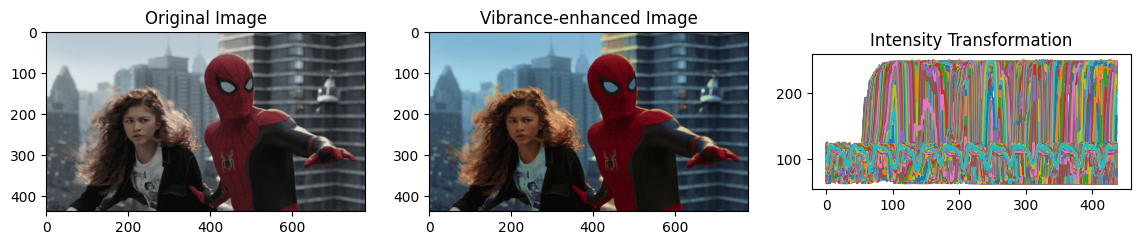

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("spider.png")

# (a)
h, s, v = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))

# (b),(c)
sigma = 70
a=0.5
t = np.minimum(s+(a*128*np.exp(-(s-128)**2/(2*sigma**2))),255).astype(np.uint8)

# (d)
combined_img = cv.merge([h, t, v])

# (e)
fig, ax = plt.subplots(1,3, figsize = (14,14))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(combined_img,cv.COLOR_HSV2RGB)), ax[1].set_title('Vibrance-enhanced Image')
ax[2].plot(t), ax[2].set_title("Intensity Transformation"), ax[2].set_aspect('equal')
plt.show()

Question 05 - Histogram equalization

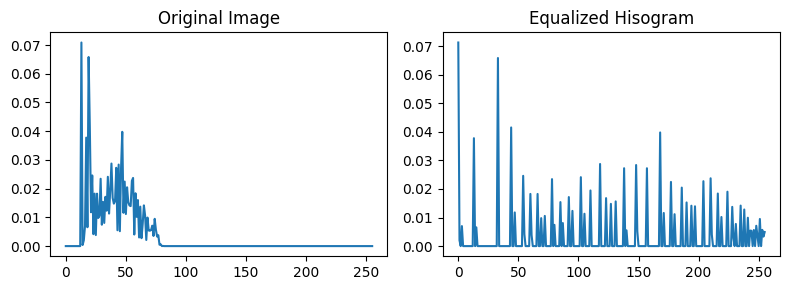

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
equalized_image = cv.equalizeHist(image)

original_hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
equalized_hist, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])
original_hist = original_hist / original_hist.sum()
equalized_hist = equalized_hist / equalized_hist.sum()

fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].plot(original_hist), ax[0].set_title("Original Image")
ax[1].plot(equalized_hist), ax[1].set_title("Equalized Hisogram")
plt.tight_layout()
plt.show()

cv.imshow('Original Image', image)
cv.imshow('Equalized Image', equalized_image)
cv.waitKey(0)
cv.destroyAllWindows()


Question 06 - histogram equalized foreground

Text(0.5, 1.0, 'Result with Histogram-Equalized Foreground')

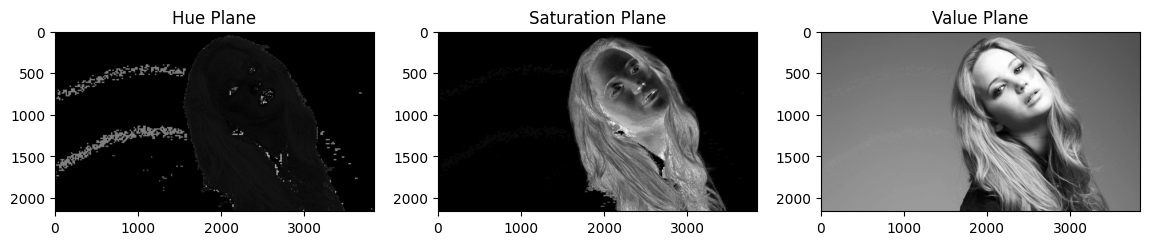

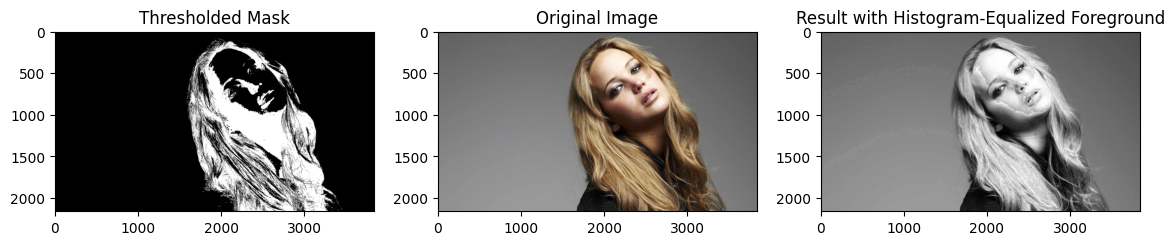

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("jeniffer.jpg")

# (a)
h, s, v = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))
fig, ax = plt.subplots(1,3, figsize = (14,14))
ax[0].imshow(cv.cvtColor(h,cv.IMREAD_GRAYSCALE)), ax[0].set_title('Hue Plane')
ax[1].imshow(cv.cvtColor(s,cv.IMREAD_GRAYSCALE)), ax[1].set_title('Saturation Plane')
ax[2].imshow(cv.cvtColor(v,cv.IMREAD_GRAYSCALE)), ax[2].set_title('Value Plane')
 
_, thresholded_mask = cv.threshold(s, 100, 255, cv.THRESH_BINARY) # (b)

foreground = cv.bitwise_and(v, thresholded_mask) # (c)

foreground_hist = cv.calcHist([foreground], [0], thresholded_mask, [256], [0, 256]) # (d)
cumulative_hist = np.cumsum(foreground_hist)

equalized_foreground = cv.equalizeHist(foreground) # (e)

background = cv.bitwise_not(thresholded_mask) # (f)
background_image = cv.bitwise_and(v, background)
result_value = cv.add(equalized_foreground, background_image)

fig, ax = plt.subplots(1, 3, figsize=(14,14))
ax[0].imshow(thresholded_mask, cmap='gray')
ax[0].set_title("Thresholded Mask")
ax[1].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB), cmap='gray')
ax[1].set_title("Original Image")
ax[2].imshow(result_value, cmap='gray')
ax[2].set_title("Result with Histogram-Equalized Foreground")

Question 07 -  Sobel Filter

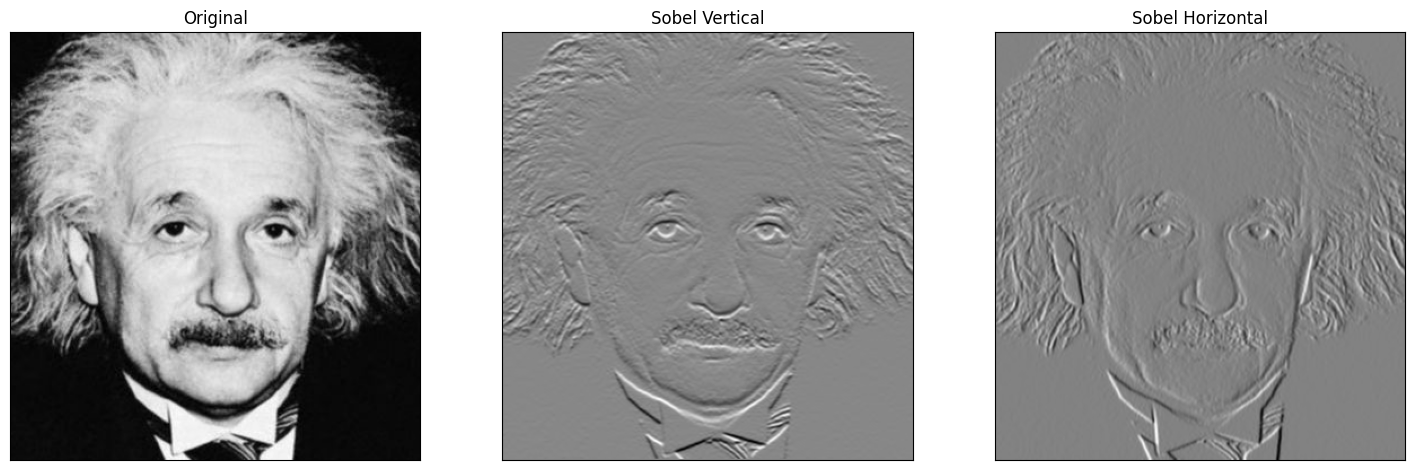

In [9]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
# Sobel vertical
kernel_v = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel_v)
# Sobel horizontal
kernel_h = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgd = cv.filter2D(img,-1,kernel_h)


fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgd, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
plt.show()

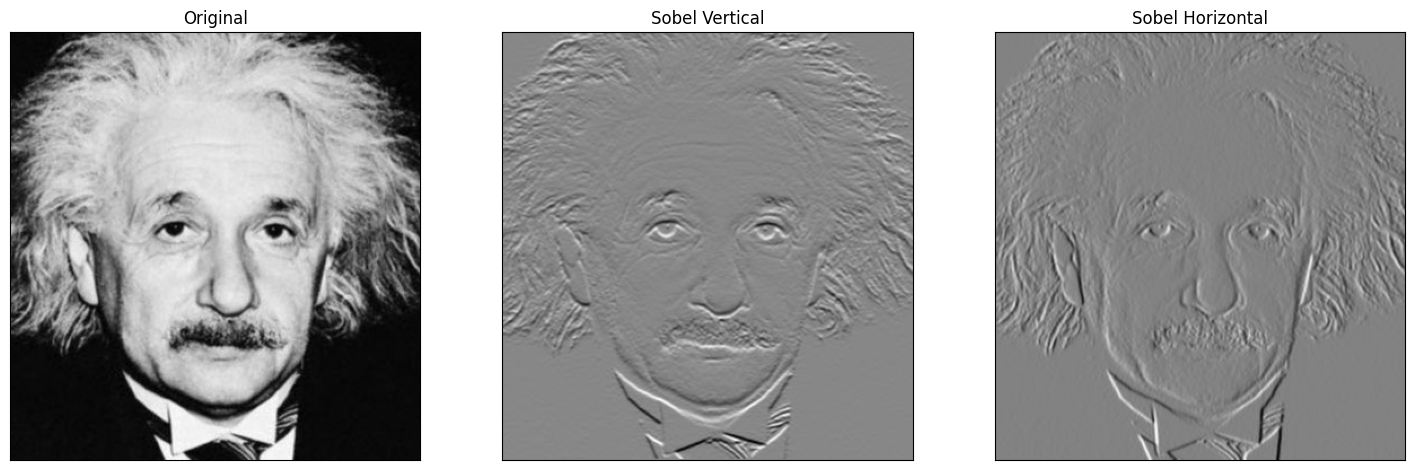

In [57]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img= cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
imgc = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
imgd = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)

fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgd, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
plt.show()

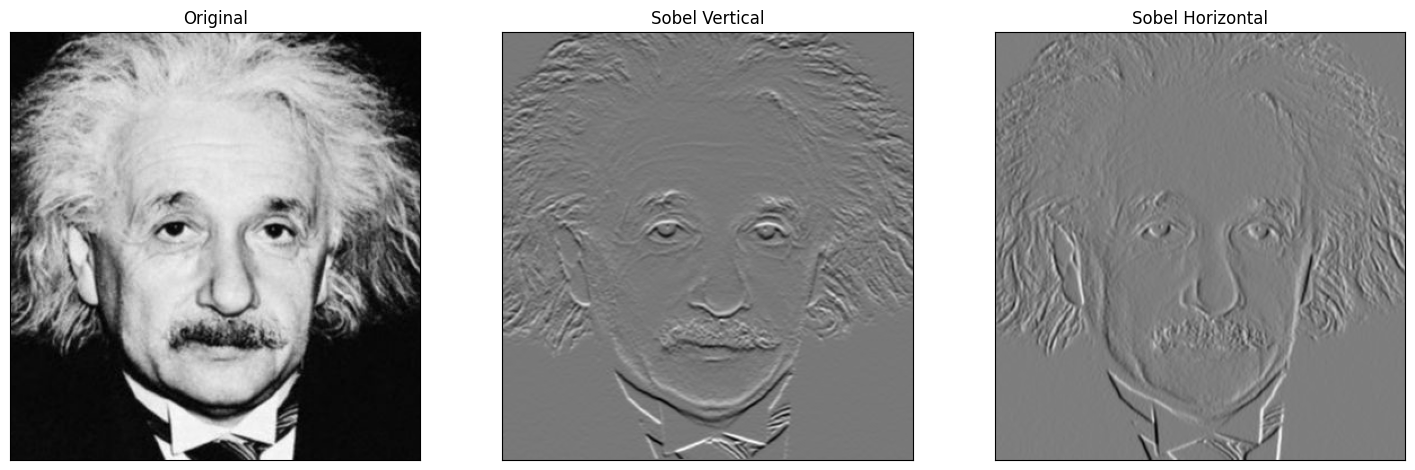

In [59]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
kernel_h = np.array([1,2,1], dtype=np.float32)
kernel_v = np.array([1,0,-1], dtype=np.float32)
imgc = cv.sepFilter2D(img, -1, kernel_h, kernel_v)
imgd = cv.sepFilter2D(img, -1, kernel_v, kernel_h)

fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgd, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
plt.show()

Question 08 - Zooming Images

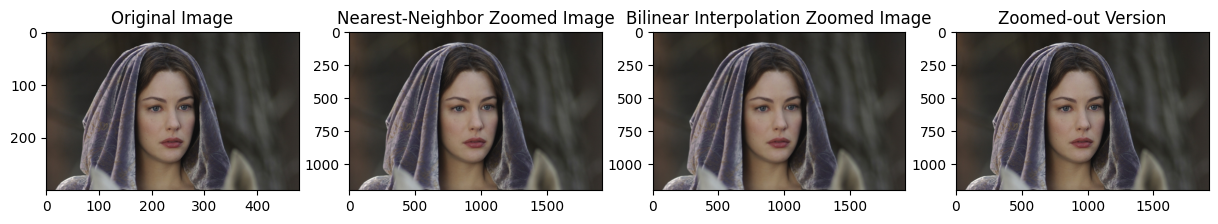

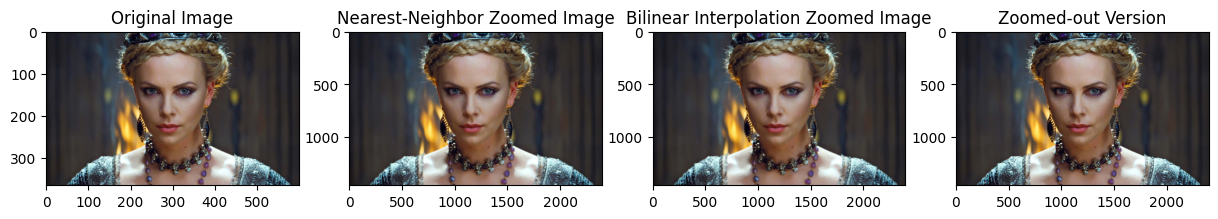

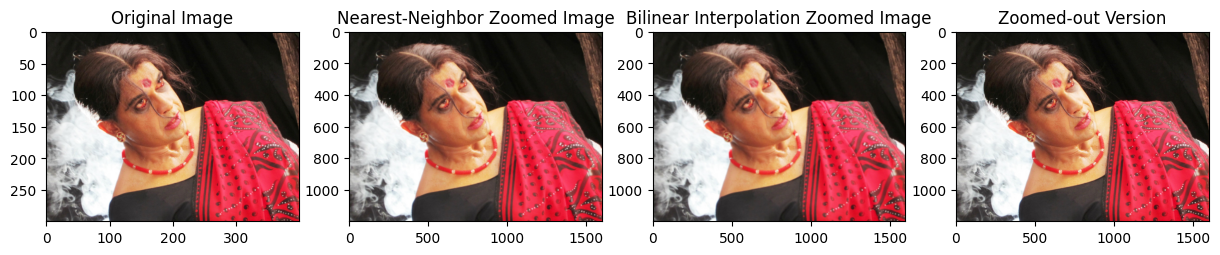

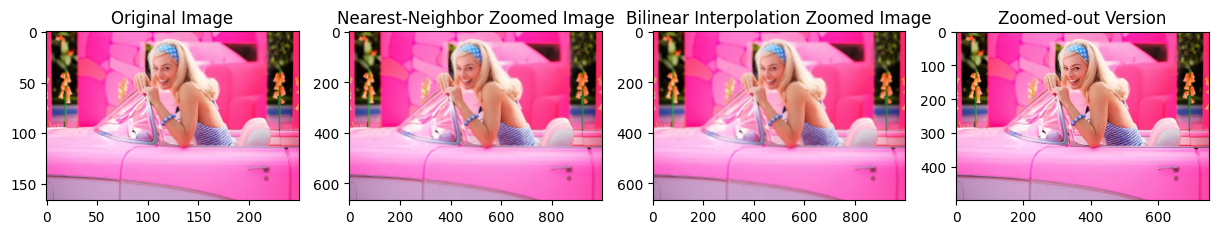

In [60]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
originals = ["im02small.png", "im03small.png", "im09small.png","im11small.png"]
zoomed_outs = ["im02.png", "im03.png", "im09.png", "im11.png"]
for i in range(4):
    img = cv.imread(originals[i])
    imgz = cv.imread(zoomed_outs[i])
    img_near = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
    img_bilinear = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)
    fig, ax = plt.subplots(1,4, figsize=(15,15))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title("Original Image")
    ax[1].imshow(cv.cvtColor(img_near,cv.COLOR_BGR2RGB)), ax[1].set_title("Nearest-Neighbor Zoomed Image")
    ax[2].imshow(cv.cvtColor(img_bilinear,cv.COLOR_BGR2RGB)), ax[2].set_title("Bilinear Interpolation Zoomed Image")
    ax[3].imshow(cv.cvtColor(imgz,cv.COLOR_BGR2RGB)), ax[3].set_title("Zoomed-out Version")
    plt.show()


Question 09 - Produce an enhanced image with a substantially blurred background

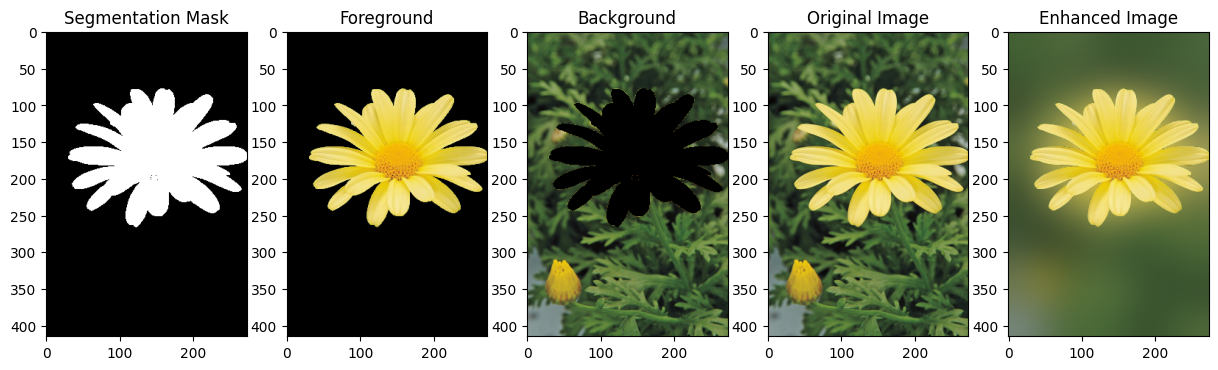

In [6]:
# (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('flower.png')

mask = np.zeros(image.shape[:2], np.uint8)
rect = (30, 30, image.shape[1] - 30, image.shape[0] - 150)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]

fig, ax = plt.subplots(1,5, figsize = (15,15))
ax[0].imshow(mask2, cmap='gray')
ax[0].set_title('Segmentation Mask')
ax[1].imshow(cv.cvtColor(segmented_image,cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground')
ax[2].imshow(cv.cvtColor(image - segmented_image,cv.COLOR_BGR2RGB))
ax[2].set_title('Background')

# (b)
blurred_background = cv.GaussianBlur(image, (0, 0), 30)
enhanced_image = np.where(mask2[:, :, np.newaxis] == 1, image, blurred_background)

ax[3].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[3].set_title('Original Image')
ax[4].imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
ax[4].set_title('Enhanced Image')
plt.show()
